# Classification Assigment

In [3]:
# dataset upload
import pandas as pd 

ds = pd.read_csv("model.csv", index_col=0) #dropping the index as a variable because it would have no meaning in the training phase
ds

,Gender,Age,Driving_License,Licence_Type,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Seniority,Target
id,,,,,,,,,,,,
1,Female,44,1,M,30,No,1-2 Year,Yes,25741,154,152,0
2,Male,23,1,M,3,Yes,< 1 Year,No,2630,152,256,0
3,Male,43,1,C,28,No,1-2 Year,Yes,70720,52,224,0
4,Male,60,1,B,28,Yes,1-2 Year,No,48512,26,86,0
5,Female,42,1,B,46,No,1-2 Year,Yes,32169,124,132,0
...,...,...,...,...,...,...,...,...,...,...,...,...
102347,Female,25,1,B,32,Yes,< 1 Year,No,34695,152,133,0
102348,Female,47,1,M,28,No,1-2 Year,Yes,30564,26,114,1
102349,Male,72,1,M,8,No,> 2 Years,Yes,52844,124,92,1


## Data pre-processing: DATA PREPARATION (validation, transformation, reduction) AND ESPLORATION (univ, bivar, multivar)

### -- DATA VALIDATION --

In [4]:
# duplicated data

ds[ds.duplicated()]

,Gender,Age,Driving_License,Licence_Type,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Seniority,Target
id,,,,,,,,,,,,
21349,Female,42,1,D,45,Yes,1-2 Year,No,2630,26,281,0
71659,Female,42,1,D,28,No,1-2 Year,Yes,2630,26,150,1
90844,Male,43,1,M,15,No,1-2 Year,Yes,2630,124,262,1
94472,Male,65,1,C,31,No,1-2 Year,Yes,2630,124,276,0


In [5]:
#removing duplicate data since they're not useful in the training phase
ds = ds.drop_duplicates()

In [6]:
# missing data

nan = ds.isna()
nan.sum(axis = 0, skipna = True) #counts how many data are missing for each attribute

Gender                     0
Age                        0
Driving_License            0
Licence_Type            5091
Region_Code                0
Previously_Insured         0
Vehicle_Age                0
Vehicle_Damage             0
Annual_Premium             0
Policy_Sales_Channel       0
Seniority                  0
Target                     0
dtype: int64

In [7]:
# suspect: check if the 5091 missing data from License_Type correspond to Driving_License = 0

DL = ds.loc[ds['Driving_License'] == 0]
DL.isna().sum(axis = 0, skipna = True)

Gender                     0
Age                        0
Driving_License            0
Licence_Type            5091
Region_Code                0
Previously_Insured         0
Vehicle_Age                0
Vehicle_Damage             0
Annual_Premium             0
Policy_Sales_Channel       0
Seniority                  0
Target                     0
dtype: int64

In [8]:
#yes, they're all there!

In [9]:
#substituting missing datas in the Licence_Type column with zeroes

ds_notna = ds.fillna(0)

In [10]:
nan = ds_notna.isna()
nan.sum(axis = 0, skipna = True)

Gender                  0
Age                     0
Driving_License         0
Licence_Type            0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Seniority               0
Target                  0
dtype: int64

# Categorical variables

In [11]:
#check the variables type

ds_notna.dtypes

Gender                  object
Age                      int64
Driving_License          int64
Licence_Type            object
Region_Code              int64
Previously_Insured      object
Vehicle_Age             object
Vehicle_Damage          object
Annual_Premium           int64
Policy_Sales_Channel     int64
Seniority                int64
Target                   int64
dtype: object

In [12]:
#Driving_License, Region_Code and Policy_Sales_Channel are actually categorical variables, 
#so we have to convert them in object-type variables

ds_notna['Driving_License'] = ds_notna['Driving_License'].astype('object')
ds_notna['Region_Code'] = ds_notna['Region_Code'].astype('object')
ds_notna['Policy_Sales_Channel'] = ds_notna['Policy_Sales_Channel'].astype('object')

#Target is also a categorical variable, but we keep it with the numericals for now (useful for the pairplot)

In [13]:
ds_notna.dtypes

Gender                  object
Age                      int64
Driving_License         object
Licence_Type            object
Region_Code             object
Previously_Insured      object
Vehicle_Age             object
Vehicle_Damage          object
Annual_Premium           int64
Policy_Sales_Channel    object
Seniority                int64
Target                   int64
dtype: object

In [14]:
#split categorical variables from the dataset

ds_cat = ds_notna.select_dtypes(include=['object']) #categorical
ds_cat

,Gender,Driving_License,Licence_Type,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel
id,,,,,,,,
1,Female,1,M,30,No,1-2 Year,Yes,154
2,Male,1,M,3,Yes,< 1 Year,No,152
3,Male,1,C,28,No,1-2 Year,Yes,52
4,Male,1,B,28,Yes,1-2 Year,No,26
5,Female,1,B,46,No,1-2 Year,Yes,124
...,...,...,...,...,...,...,...,...
102347,Female,1,B,32,Yes,< 1 Year,No,152
102348,Female,1,M,28,No,1-2 Year,Yes,26
102349,Male,1,M,8,No,> 2 Years,Yes,124


In [15]:
ds_cat.columns

Index(['Gender', 'Driving_License', 'Licence_Type', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage',
       'Policy_Sales_Channel'],
      dtype='object')

In [16]:
#Converting categorical variables into boolean (0s and 1s)

dummies1 = pd.get_dummies(ds_cat[['Region_Code', 'Vehicle_Age', 'Policy_Sales_Channel']],drop_first=False)
dummies2 = pd.get_dummies(ds_cat[['Gender', 'Previously_Insured', 'Vehicle_Damage', 'Licence_Type']],drop_first=True)
#Driving_License column has been excluded beacause all the information contained in it is included in the Licence_Type columns

dummies = pd.concat([dummies1, dummies2], axis=1)

dummies

,Region_Code_0,Region_Code_1,Region_Code_2,Region_Code_3,Region_Code_4,Region_Code_5,Region_Code_6,Region_Code_7,Region_Code_8,Region_Code_9,...,Policy_Sales_Channel_160,Policy_Sales_Channel_163,Gender_Male,Previously_Insured_Yes,Vehicle_Damage_Yes,Licence_Type_A,Licence_Type_B,Licence_Type_C,Licence_Type_D,Licence_Type_M
id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102347,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
102348,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
102349,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,1


# Numerical Variables

In [17]:
ds_num = ds_notna.select_dtypes(include=['int64']) #numerical
ds_num

,Age,Annual_Premium,Seniority,Target
id,,,,
1,44,25741,152,0
2,23,2630,256,0
3,43,70720,224,0
4,60,48512,86,0
5,42,32169,132,0
...,...,...,...,...
102347,25,34695,133,0
102348,47,30564,114,1
102349,72,52844,92,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015FD88761C8>,
      dtype=object)

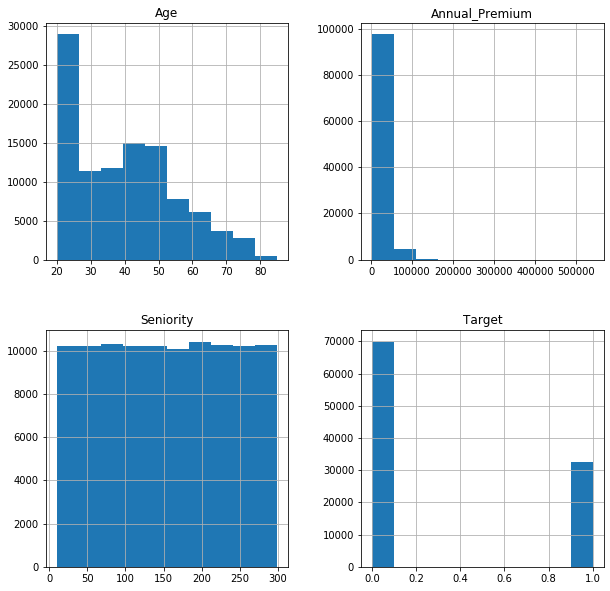

In [18]:
# operating with numerical variables

ds_num.hist(figsize=(10,10))

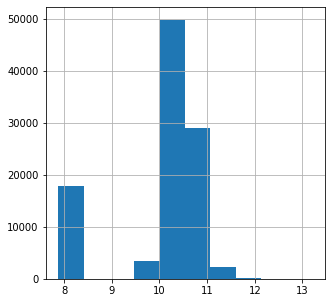

In [19]:
#log on Annual_Premium

import math
pd.options.mode.chained_assignment = None

ds_num['logPremium']=ds_num['Annual_Premium'].apply(math.log)

ds_num['logPremium'].hist(figsize=(5,5))

In [20]:
#pairplot
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
ds_num.columns

Index(['Age', 'Annual_Premium', 'Seniority', 'Target', 'logPremium'], dtype='object')

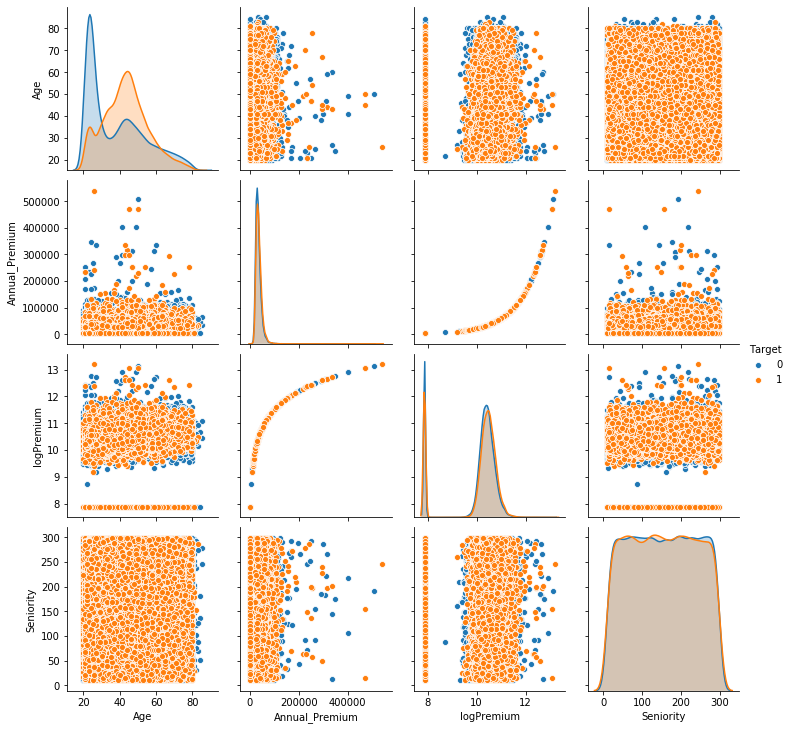

In [22]:
sns.pairplot(ds_num[['Age', 'Annual_Premium', 'logPremium', 'Seniority', 'Target',
       ]], hue='Target')

In [23]:
#now we can remove the Target column from ds_num (since it's actually a categorical variable) and keep it for the calssification
ds_target = ds_num.iloc[:,-2]
ds_target

id
1         0
2         0
3         0
4         0
5         0
         ..
102347    0
102348    1
102349    1
102350    0
102351    0
Name: Target, Length: 102347, dtype: int64

In [24]:
ds_num2 = ds_num.drop(['Target'], axis=1)
ds_num2

,Age,Annual_Premium,Seniority,logPremium
id,,,,
1,44,25741,152,10.155840
2,23,2630,256,7.874739
3,43,70720,224,11.166484
4,60,48512,86,10.789566
5,42,32169,132,10.378759
...,...,...,...,...
102347,25,34695,133,10.454351
102348,47,30564,114,10.327578
102349,72,52844,92,10.875099


# Outliers

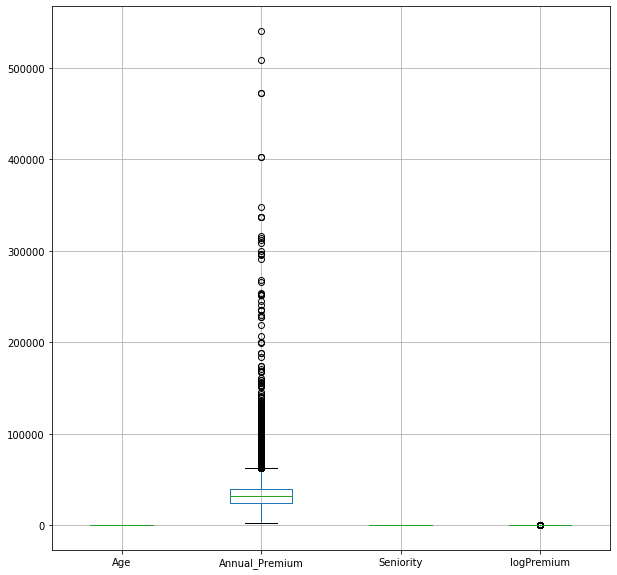

In [25]:
ds_num2.boxplot(figsize=(10,10)) #boxplot for all the numerical variables

count    73721.000000
mean     33245.161623
std       7044.910365
min      13213.000000
25%      27950.000000
50%      32866.000000
75%      38378.000000
max      48293.000000
Name: Annual_Premium, dtype: float64

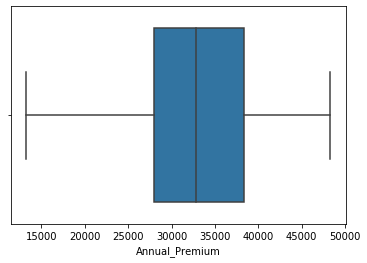

In [26]:
# noisy data (outliers) -> has sense doing that only for: Age; Region_Code; Annual_Premium; Policy_Sales_Channel; Seniority
import numpy as np

%matplotlib inline
import seaborn as sns

#sns.boxplot(x = ds['Age']) # Do not have outilers. all data keeped.
#sns.boxplot(x = ds['Region_Code']) # Do not have outilers. all data keeped.
#sns.boxplot(x = ds['Annual_Premium'])
#sns.boxplot(x = ds['Policy_Sales_Channel']) # Do not have outilers. all data keeped.
#sns.boxplot(x = ds['Seniority']) # Do not have outilers. all data keeped.

#ds["Annual_Premium"].describe()

#since it is normal then I CAN REMOVE OUTLIERS Using Normal Distribution and S.D
mean = ds_num2["Annual_Premium"].mean()
sd = ds_num2["Annual_Premium"].std()

# keep only the ones that are within +x to -x standard deviations in the column DIS
x = 1 # with 2 -> eliminate 2%, with 1 -> eliminate 28%
Annual_Premium = ds_num2["Annual_Premium"]
Annual_Premium_noOutlier = Annual_Premium[ np.abs(Annual_Premium - mean) <= x * sd ]

#sns.boxplot(x = ds['Annual_Premium'])
sns.boxplot(x = Annual_Premium_noOutlier)

#ds["Annual_Premium"].describe()
Annual_Premium_noOutlier.describe()

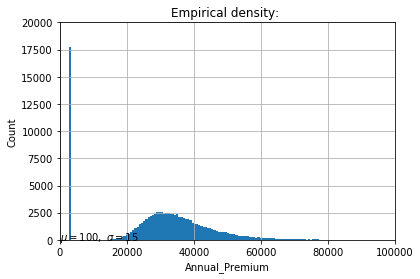

In [27]:
#original empirical density
ds_num2.hist(column="Annual_Premium",bins='auto') 

plt.xlabel('Annual_Premium')
plt.ylabel('Count')
plt.title('Empirical density: ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.xlim(0, 100000) #100000
plt.ylim(0, 20000)
plt.grid(True)
plt.show()

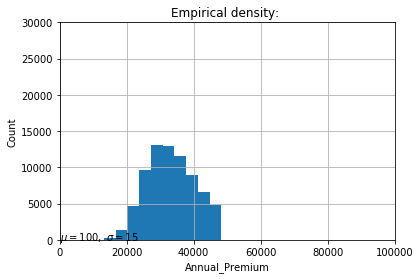

In [28]:
#after removing the outliers:
Annual_Premium_noOutlier.hist()

plt.xlabel('Annual_Premium')
plt.ylabel('Count')
plt.title('Empirical density: ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.xlim(0, 100000) #100000
plt.ylim(0, 30000)
plt.grid(True)
plt.show()

In [29]:
# eliminate outliers data from ds
Annual_Premium_noOutlier1 = np.array(Annual_Premium_noOutlier.index)
ds_index = np.array(ds_num2.index)
Annual_Premium_Outlier = np.delete(ds_index, Annual_Premium_noOutlier1)

ds_num_noOL = ds_num2.drop(Annual_Premium_Outlier)


ds_num_noOL

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  after removing the cwd from sys.path.


,Age,Annual_Premium,Seniority,logPremium
id,,,,
2,23,2630,256,7.874739
6,40,34092,285,10.436818
7,26,22452,59,10.019135
8,28,36869,60,10.515126
9,23,34853,83,10.458894
...,...,...,...,...
102345,29,2630,88,7.874739
102346,24,2630,267,7.874739
102347,25,34695,133,10.454351


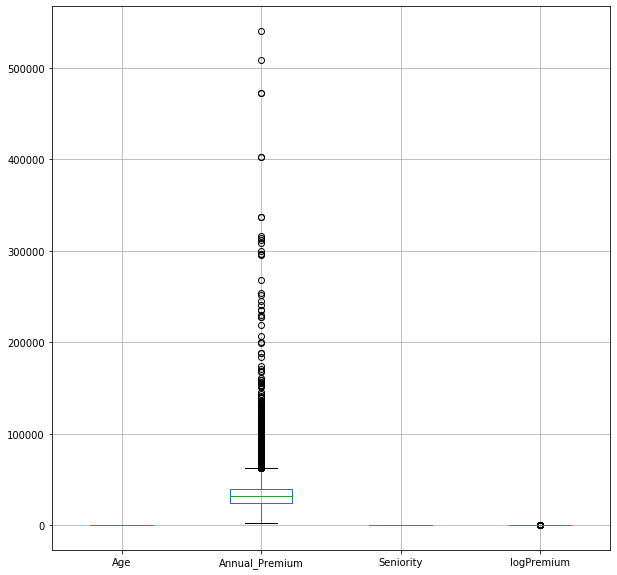

In [30]:
ds_num_noOL.boxplot(figsize=(10,10))

### -- DATA TRANSFORMATION --

# Standardization

In [31]:
#z-score
from sklearn.preprocessing import StandardScaler

zscaler = StandardScaler().fit(ds_num_noOL)
ds_zscaled = pd.DataFrame(zscaler.transform(ds_num_noOL))
ds_zscaled.index = ds_num_noOL.index
ds_zscaled.columns = ds_num_noOL.columns
ds_zscaled = ds_zscaled.sort_index(ascending=True)

ds_zscaled

,Age,Annual_Premium,Seniority,logPremium
id,,,,
2,-1.128624,-1.586838,1.211725,-2.102875
6,0.009765,0.188661,1.557682,0.416974
7,-0.927731,-0.468221,-1.138395,0.006175
8,-0.793803,0.345375,-1.126466,0.493992
9,-1.128624,0.231606,-0.852086,0.438687
...,...,...,...,...
102345,-0.726839,-1.586838,-0.792438,-2.102875
102346,-1.061659,-1.586838,1.342950,-2.102875
102347,-0.994695,0.222690,-0.255609,0.434218


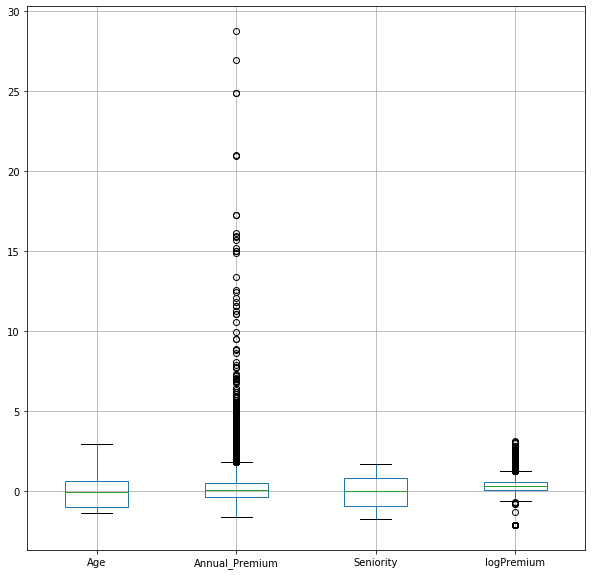

In [32]:
ds_zscaled.boxplot(figsize=(10,10))

In [98]:
# merging on ds_cat and ds_num
ds_finalA = pd.merge(dummies, ds_zscaled, left_index=True, right_index=True)
ds_final0 = pd.merge(ds_finalA, ds_target, left_index=True, right_index=True)
ds_final0

,Region_Code_0,Region_Code_1,Region_Code_2,Region_Code_3,Region_Code_4,Region_Code_5,Region_Code_6,Region_Code_7,Region_Code_8,Region_Code_9,...,Licence_Type_A,Licence_Type_B,Licence_Type_C,Licence_Type_D,Licence_Type_M,Age,Annual_Premium,Seniority,logPremium,Target
id,,,,,,,,,,,,,,,,,,,,,
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,-1.128624,-1.586838,1.211725,-2.102875,0
6,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0.009765,0.188661,1.557682,0.416974,1
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,-0.927731,-0.468221,-1.138395,0.006175,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,-0.793803,0.345375,-1.126466,0.493992,1
9,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,-1.128624,0.231606,-0.852086,0.438687,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102345,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,-0.726839,-1.586838,-0.792438,-2.102875,1
102346,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,-1.061659,-1.586838,1.342950,-2.102875,0
102347,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,-0.994695,0.222690,-0.255609,0.434218,0


### -- DATA REDUCTION --

In [93]:
#Feature Selection by Correlation
#calculating the correlation between attributes and target

correlation = ds_final.apply(lambda s: ds_final.corrwith(s, method='pearson'))

In [96]:
#converting it to a list and caculating its absolute value to compare with the threshold

corr_list = correlation['Target'].tolist()
corr_abs = [abs(x) for x in corr_list]
corr_abs

[0.013777446962658457,
 0.001896704714572624,
 0.027016355376664948,
 0.002634955432153442,
 0.013590426743074919,
 0.002093710047463361,
 0.0339080232974476,
 0.0002727219142630409,
 0.03696398904151328,
 0.013661390310263387,
 0.0283515354153033,
 0.0040493152457713975,
 0.015304739799684186,
 0.017328090861976838,
 0.01916627143845864,
 0.04403999695445026,
 0.0164824264681204,
 0.020360058887687636,
 0.00661870384130417,
 0.013988085134161481,
 0.006482623340936486,
 0.023838950653545486,
 0.014596921968774627,
 0.01235375435275137,
 0.007472894606238416,
 0.03283167452968463,
 0.018989949669755268,
 0.02054996024655987,
 0.16887195654608564,
 0.002280422717846858,
 0.039242375582661755,
 0.004106408749215281,
 0.01571452230229675,
 0.015361097400443847,
 0.011327024924538485,
 0.0027715601510141445,
 0.031204599385340016,
 0.02288232648525064,
 0.017521108322533334,
 0.0005164451876080984,
 0.0025440614094390367,
 0.004488351036216324,
 0.0110261732948157,
 0.012723524666221918,
 

In [99]:
#creating a dataset also containing the correlation of each attribute with Target

ds_final0.loc['Correlation'] = corr_abs
ds_final0

,Region_Code_0,Region_Code_1,Region_Code_2,Region_Code_3,Region_Code_4,Region_Code_5,Region_Code_6,Region_Code_7,Region_Code_8,Region_Code_9,...,Licence_Type_A,Licence_Type_B,Licence_Type_C,Licence_Type_D,Licence_Type_M,Age,Annual_Premium,Seniority,logPremium,Target
id,,,,,,,,,,,,,,,,,,,,,
2,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.00000,-1.128624,-1.586838,1.211725,-2.102875,0.0
6,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.00000,0.009765,0.188661,1.557682,0.416974,1.0
7,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.00000,-0.927731,-0.468221,-1.138395,0.006175,0.0
8,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.00000,-0.793803,0.345375,-1.126466,0.493992,1.0
9,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.00000,-1.128624,0.231606,-0.852086,0.438687,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102346,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.00000,-1.061659,-1.586838,1.342950,-2.102875,0.0
102347,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.00000,-0.994695,0.222690,-0.255609,0.434218,0.0
102348,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.00000,0.478513,-0.010435,-0.482270,0.309535,1.0


In [102]:
#dropping the nan values (sometimes we generate them because with the removal of the outliers some columns uniquely associated
# to a removed observation remains with only one value, in this case 0, so the variance associated is 0 and in the calculus of
# the correlation we get a division by 0)

ds_final1 = ds_final0.dropna(axis=1)
ds_final1

,Region_Code_0,Region_Code_1,Region_Code_2,Region_Code_3,Region_Code_4,Region_Code_5,Region_Code_6,Region_Code_7,Region_Code_8,Region_Code_9,...,Licence_Type_A,Licence_Type_B,Licence_Type_C,Licence_Type_D,Licence_Type_M,Age,Annual_Premium,Seniority,logPremium,Target
id,,,,,,,,,,,,,,,,,,,,,
2,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.00000,-1.128624,-1.586838,1.211725,-2.102875,0.0
6,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.00000,0.009765,0.188661,1.557682,0.416974,1.0
7,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.00000,-0.927731,-0.468221,-1.138395,0.006175,0.0
8,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.00000,-0.793803,0.345375,-1.126466,0.493992,1.0
9,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.00000,-1.128624,0.231606,-0.852086,0.438687,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102346,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.00000,-1.061659,-1.586838,1.342950,-2.102875,0.0
102347,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.00000,-0.994695,0.222690,-0.255609,0.434218,0.0
102348,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.00000,0.478513,-0.010435,-0.482270,0.309535,1.0


In [131]:
#mantaining only the features (columns) more correlated with the target (threshold = 0.1)

corr_ok = (ds_final1.loc[["Correlation"]] >= 0.1).any().tolist()
corr_ok

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 Fals

In [136]:
ds_final2 = ds_final1.loc[:,corr_ok]

In [138]:
#dropping the Correlation row
ds_final = ds_final2.drop('Correlation')
ds_final

,Region_Code_28,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Policy_Sales_Channel_26,Policy_Sales_Channel_124,Policy_Sales_Channel_152,Policy_Sales_Channel_160,Previously_Insured_Yes,Vehicle_Damage_Yes,Age,Target
id,,,,,,,,,,,,
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-1.128624,0.0
6,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.009765,1.0
7,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-0.927731,0.0
8,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.793803,1.0
9,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-1.128624,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
102345,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.726839,1.0
102346,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,-1.061659,0.0
102347,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-0.994695,0.0


## Models

In [139]:
#separating train and test set

X = ds_final.iloc[:,0:-1] #explanatory variables
y = ds_final.iloc[:,-1] #target variables

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size =0.30,
                                                    stratify=y,
                                                    random_state= 666)

print(X_train.shape, X_test.shape)

(51602, 11) (22116, 11)


In [140]:
train_set = pd.concat([X_train,y_train], axis=1)

Target
0.0    35292
1.0    16310
dtype: int64


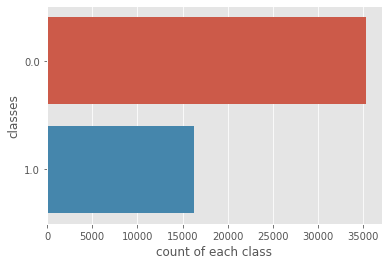

In [141]:
#distribution of targets in the train set

print(train_set.groupby('Target').size()) #"target" is the name of the target column, change it accordingly to your dataset
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

#Visualize Class Counts
sns.countplot(y=train_set.Target ,data=train_set) #"target" is the name of the target column, change it accordingly to your dataset
plt.xlabel("count of each class")
plt.ylabel("classes")
plt.show()

In [143]:
#downsampling the majority class on the train set

from sklearn.utils import resample

#1) Separate majority and minority classes
train_majority = train_set[train_set.Target==0]
train_minority = train_set[train_set.Target==1] 

train_majority_downsampled = resample(train_majority, 
                                   replace=False, 
                                   n_samples=16310,      #number of samples in minority class 
                                   random_state=120)
train_downsampled = pd.concat([train_majority_downsampled, train_minority])
train_downsampled.Target.value_counts()

1.0    16310
0.0    16310
Name: Target, dtype: int64

Target
0.0    16310
1.0    16310
dtype: int64


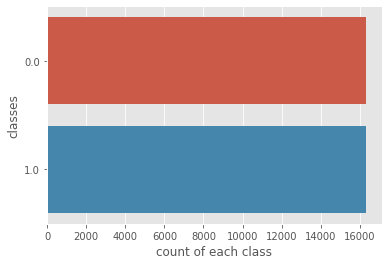

In [144]:
print(train_downsampled.groupby('Target').size()) 

#some imports to plot 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

#Visualize Class Counts
sns.countplot(y=train_downsampled.Target ,data=train_downsampled) 
plt.xlabel("count of each class")
plt.ylabel("classes")
plt.show()

In [145]:
train_downsampled

,Region_Code_28,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Policy_Sales_Channel_26,Policy_Sales_Channel_124,Policy_Sales_Channel_152,Policy_Sales_Channel_160,Previously_Insured_Yes,Vehicle_Damage_Yes,Age,Target
id,,,,,,,,,,,,
78165,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-1.128624,0.0
23359,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.994695,0.0
18100,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.750830,0.0
31145,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-0.525947,0.0
77330,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-1.061659,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
86642,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.124163,1.0
64921,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.545477,1.0
77190,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.219578,1.0


In [146]:
X_train_downsampled = train_downsampled.iloc[:,0:-1]
y_train_downsampled = train_downsampled.iloc[:,-1]

In [147]:
#importing the quality metrics functions

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import f1_score

In [148]:
#funzione di ricerca dei parametri migliori

def hyperp_search(classifier, parameters):
    gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=0, n_jobs=-1)
    gs = gs.fit(X_train_downsampled, y_train_downsampled)
    print("f1_train: %f using %s" % (gs.best_score_, gs.best_params_))
    
    means = gs.cv_results_['mean_test_score']
    stds = gs.cv_results_['std_test_score']
    params = gs.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("Mean %f Std (%f) with: %r" % (mean, stdev, param))

    best_model = gs.best_estimator_
    y_pred = best_model.predict(X_test)

    print("f1_test: ", f1_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

In [149]:
#funzione curva roc

def roc(classifier,X_train_downsampled,y_train_downsampled,X_test,y_test):
    classifier.fit(X_train_downsampled, y_train_downsampled)
    y_pred = classifier.predict(X_test)

    y_probs = classifier.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

    fpr, tpr, thresholds1=metrics.roc_curve(y_test,  y_probs[:,1])

    import matplotlib.pyplot as plt
    plt.plot(fpr, tpr, label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

    auc = metrics.roc_auc_score(y_test, y_probs[:,1])
    print('AUC: %.2f' % auc)
    return (fpr, tpr)

## KNN

In [153]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
parameters = {'n_neighbors':np.arange(110,130,1)}

hyperp_search(classifier,parameters)

f1_train: 0.814678 using {'n_neighbors': 116}
Mean 0.813731 Std (0.000423) with: {'n_neighbors': 110}
Mean 0.813919 Std (0.001088) with: {'n_neighbors': 111}
Mean 0.813544 Std (0.000660) with: {'n_neighbors': 112}
Mean 0.813753 Std (0.000872) with: {'n_neighbors': 113}
Mean 0.813803 Std (0.000820) with: {'n_neighbors': 114}
Mean 0.814133 Std (0.001708) with: {'n_neighbors': 115}
Mean 0.814678 Std (0.001459) with: {'n_neighbors': 116}
Mean 0.814572 Std (0.001420) with: {'n_neighbors': 117}
Mean 0.814602 Std (0.001750) with: {'n_neighbors': 118}
Mean 0.814262 Std (0.001559) with: {'n_neighbors': 119}
Mean 0.814289 Std (0.001475) with: {'n_neighbors': 120}
Mean 0.814051 Std (0.001829) with: {'n_neighbors': 121}
Mean 0.813969 Std (0.001470) with: {'n_neighbors': 122}
Mean 0.813937 Std (0.001383) with: {'n_neighbors': 123}
Mean 0.814012 Std (0.001487) with: {'n_neighbors': 124}
Mean 0.814051 Std (0.001644) with: {'n_neighbors': 125}
Mean 0.813992 Std (0.001878) with: {'n_neighbors': 126}
Me

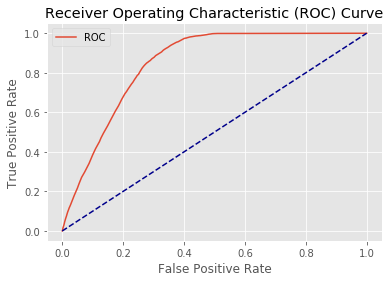

AUC: 0.84


In [165]:
classifier = KNeighborsClassifier(n_neighbors=116)
fprknn,tprknn=roc(classifier,X_train,y_train,X_test,y_test)

## Decision Tree

In [155]:
### NON ESEGUIRE PIU'!!! ###
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
parameters = {'criterion': ['entropy','gini'], 
              'max_depth': np.arange(2,11,3),
              'min_samples_split': np.arange(10,100,20),
              'min_samples_leaf': np.arange(5,20,5)}

hyperp_search(classifier,parameters)

f1_train: 0.819505 using {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 10}
Mean 0.819505 Std (0.000647) with: {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 10}
Mean 0.819505 Std (0.000647) with: {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 30}
Mean 0.819505 Std (0.000647) with: {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 50}
Mean 0.819505 Std (0.000647) with: {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 70}
Mean 0.819505 Std (0.000647) with: {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 90}
Mean 0.819505 Std (0.000647) with: {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 10, 'min_samples_split': 10}
Mean 0.819505 Std (0.000647) with: {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 10, 'min_samples_split': 30}
Mean 0.819505 St

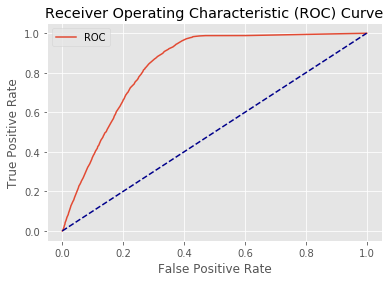

AUC: 0.84


In [156]:
model_tree = DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=5, min_samples_split=10)

fprt,tprt=roc(classifier,X_train,y_train,X_test,y_test)

## Logistic Regression

In [157]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
parameters = {"C":[1e-4,1e-3,1e-2,1e-1,1,10],"penalty":['l1','l2'],"max_iter":[2000]}

hyperp_search(classifier,parameters)

f1_train: 0.818847 using {'C': 1, 'max_iter': 2000, 'penalty': 'l2'}
Mean nan Std (nan) with: {'C': 0.0001, 'max_iter': 2000, 'penalty': 'l1'}
Mean 0.782758 Std (0.005176) with: {'C': 0.0001, 'max_iter': 2000, 'penalty': 'l2'}
Mean nan Std (nan) with: {'C': 0.001, 'max_iter': 2000, 'penalty': 'l1'}
Mean 0.807293 Std (0.002765) with: {'C': 0.001, 'max_iter': 2000, 'penalty': 'l2'}
Mean nan Std (nan) with: {'C': 0.01, 'max_iter': 2000, 'penalty': 'l1'}
Mean 0.817560 Std (0.002608) with: {'C': 0.01, 'max_iter': 2000, 'penalty': 'l2'}
Mean nan Std (nan) with: {'C': 0.1, 'max_iter': 2000, 'penalty': 'l1'}
Mean 0.818550 Std (0.001938) with: {'C': 0.1, 'max_iter': 2000, 'penalty': 'l2'}
Mean nan Std (nan) with: {'C': 1, 'max_iter': 2000, 'penalty': 'l1'}
Mean 0.818847 Std (0.001775) with: {'C': 1, 'max_iter': 2000, 'penalty': 'l2'}
Mean nan Std (nan) with: {'C': 10, 'max_iter': 2000, 'penalty': 'l1'}
Mean 0.818847 Std (0.001775) with: {'C': 10, 'max_iter': 2000, 'penalty': 'l2'}
f1_test:  0.6

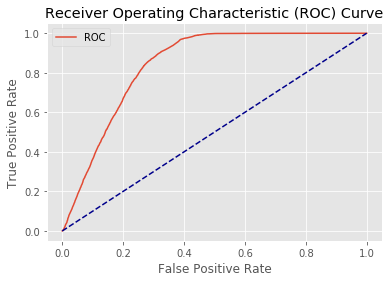

AUC: 0.84


In [158]:
classifier = LogisticRegression(C=1, penalty='l2',max_iter=2000)
fprlr,tprlr=roc(classifier,X_train,y_train,X_test,y_test)

## Naive Bayes

In [159]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

from sklearn.metrics import f1_score

print("f1_score: ", f1_score(y_test, y_pred))
print("f1_test: ", f1_score(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

f1_score:  0.6925834022608216
f1_test:  0.6925834022608216
[[10261  4865]
 [  710  6280]]
              precision    recall  f1-score   support

         0.0       0.94      0.68      0.79     15126
         1.0       0.56      0.90      0.69      6990

    accuracy                           0.75     22116
   macro avg       0.75      0.79      0.74     22116
weighted avg       0.82      0.75      0.76     22116



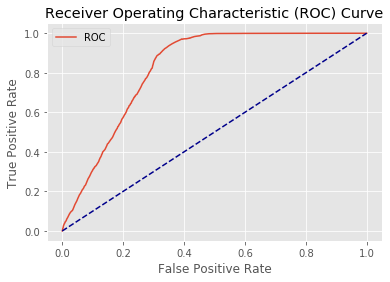

AUC: 0.82


In [160]:
classifier = GaussianNB()
fprnb,tprlnb=roc(classifier,X_train,y_train,X_test,y_test)

## Multi-Layer Perceptron

In [161]:
from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier()
parameters = {"hidden_layer_sizes":[(5, 2),(10,8,5)],  "max_iter": [2000], "alpha": [0.00001,0.1,1]}
hyperp_search(classifier,parameters)

f1_train: 0.819158 using {'alpha': 1, 'hidden_layer_sizes': (5, 2), 'max_iter': 2000}
Mean 0.819107 Std (0.001982) with: {'alpha': 1e-05, 'hidden_layer_sizes': (5, 2), 'max_iter': 2000}
Mean 0.816219 Std (0.001977) with: {'alpha': 1e-05, 'hidden_layer_sizes': (10, 8, 5), 'max_iter': 2000}
Mean 0.817527 Std (0.000909) with: {'alpha': 0.1, 'hidden_layer_sizes': (5, 2), 'max_iter': 2000}
Mean 0.817553 Std (0.001924) with: {'alpha': 0.1, 'hidden_layer_sizes': (10, 8, 5), 'max_iter': 2000}
Mean 0.819158 Std (0.001068) with: {'alpha': 1, 'hidden_layer_sizes': (5, 2), 'max_iter': 2000}
Mean 0.817051 Std (0.005166) with: {'alpha': 1, 'hidden_layer_sizes': (10, 8, 5), 'max_iter': 2000}
f1_test:  0.6939309839241766
[[9645 5481]
 [ 364 6626]]
              precision    recall  f1-score   support

         0.0       0.96      0.64      0.77     15126
         1.0       0.55      0.95      0.69      6990

    accuracy                           0.74     22116
   macro avg       0.76      0.79      0

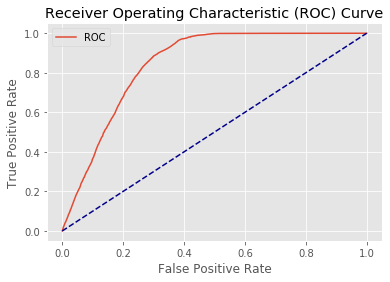

AUC: 0.84


In [162]:
classifier = MLPClassifier(hidden_layer_sizes=(5, 2),  max_iter=2000, alpha=1)
fprmlp,tprmlp=roc(classifier,X_train,y_train,X_test,y_test)